# **Lab 4: EDA: Exploratory data  analysis**


EDA is an iterative process:
*   Generate questions about your data
*   Search for answers by visualising, transforming, and modelling data


Two types of questions will always be useful for making discoveries within your data:
1.   What type of variation occurs within my variables?
2.   What type of covariation occurs between my variables?

Some comments about EDA:
*   It is not a formal process with a strict set of rules.
*   Explore many ideas: some will pan out, others will be dead ends.
*   Even if questions are predefined, quality of data still needs to be assessed

In [ ]:
library (tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## **Variation**

Variation is the tendency of the values of a variable to change from measurement to
measurement. Every variable has its own pattern of variation, which can reveal
interesting information


*   How can we plot the frequency of each level of the cut variable?
*   How can we plot the frequency of each level of the carat variable?



If we instead want a tabular format

In [ ]:
diamonds %>% count(cut)

,cut,n
,<ord>,<int>
1,Fair,1610
2,Good,4906
3,Very Good,12082
4,Premium,13791
5,Ideal,21551


You can compute `carat` histogram by hand by combining dplyr::count() and ggplot2::cut_width():

In [ ]:
diamonds %>% 
  count(cut_width(carat, 0.5))

,"cut_width(carat, 0.5)",n
,<fct>,<int>
1,"[-0.25,0.25]",785
2,"(0.25,0.75]",29498
3,"(0.75,1.25]",15977
4,"(1.25,1.75]",5313
5,"(1.75,2.25]",2002
6,"(2.25,2.75]",322
7,"(2.75,3.25]",32
8,"(3.25,3.75]",5
9,"(3.75,4.25]",4


## **Identifying typical values**
*   Which values are the most common? Why?
*   Which values are rare? Why? Does that match your expectations?
*   Can you see any unusual patterns? What might explain them?

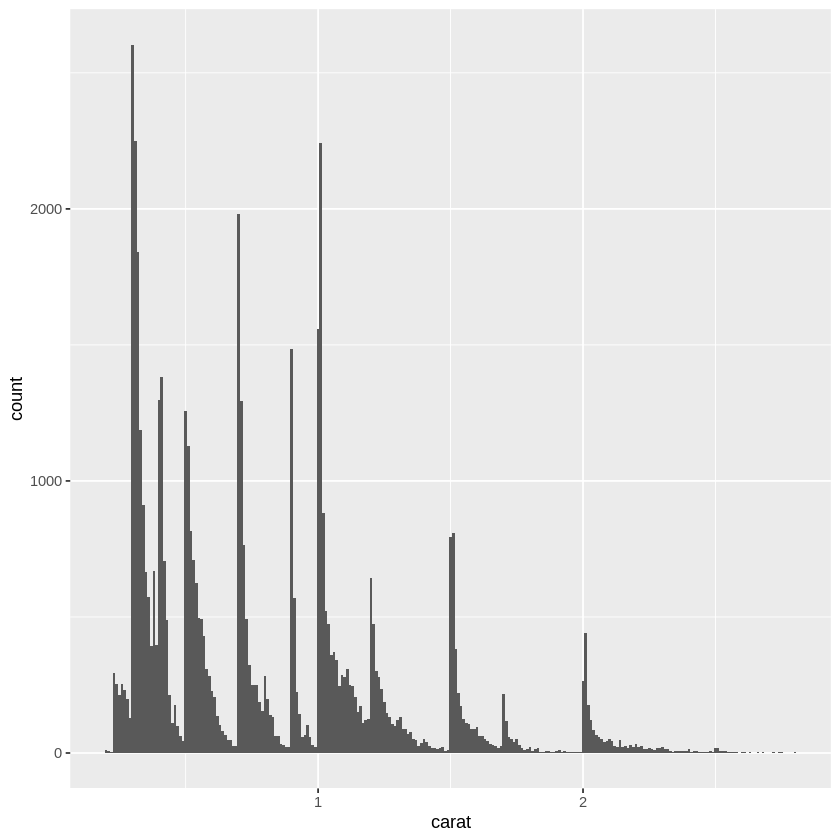

In [ ]:
diamonds %>% filter(carat < 3) %>%
  ggplot(aes(x = carat)) + geom_histogram(binwidth = 0.01)

## **Identify outliers**

Outliers are observations that are unusual – data points that don’t seem to fit the general pattern.



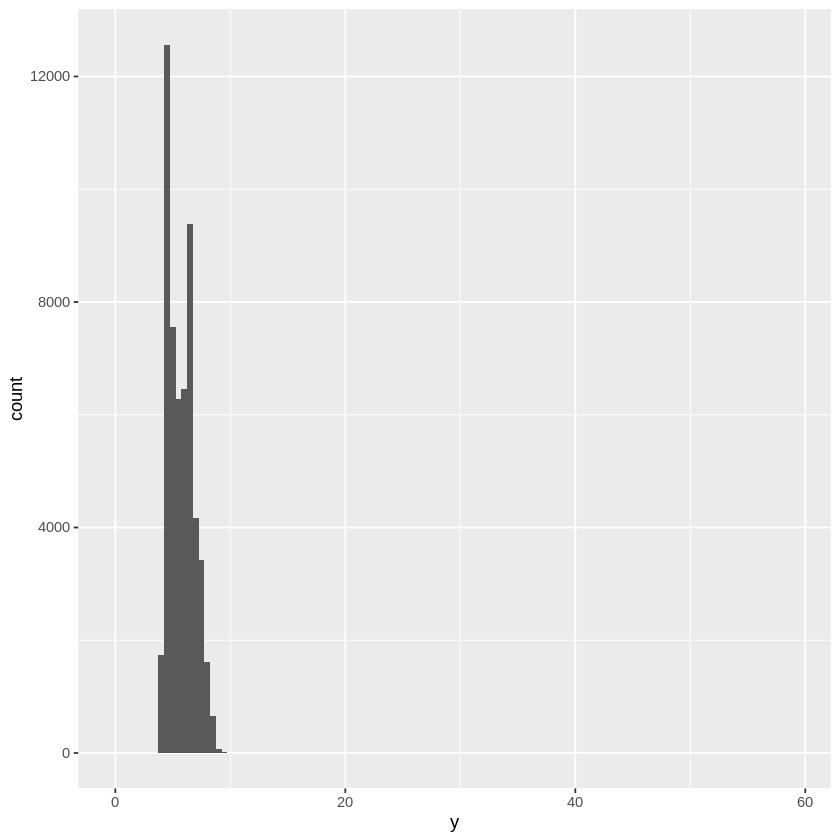

In [ ]:
ggplot(diamonds) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.5)

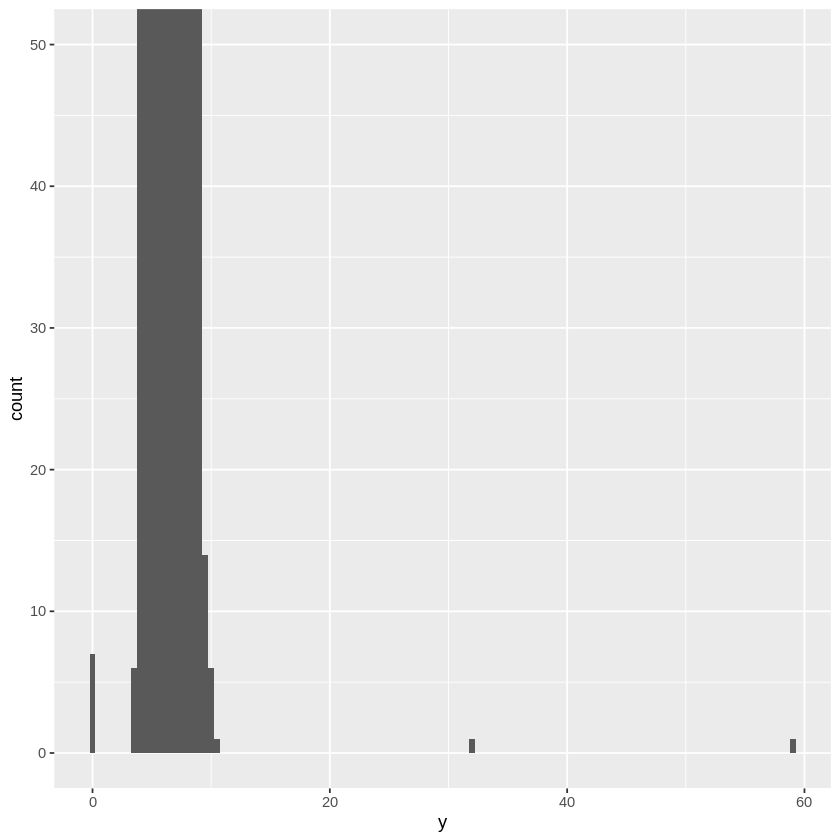

In [ ]:
ggplot(diamonds) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.5) +
  coord_cartesian(ylim = c(0, 50))

The y variable measures the length (in mm) of one of the three dimensions of a diamond.

In [ ]:
diamonds %>% filter(y < 3 | y > 20) %>% 
  select(price, carat, x, y, z) %>% arrange(y)

price,carat,x,y,z
<int>,<dbl>,<dbl>,<dbl>,<dbl>
5139,1.00,0.00,0.0,0.00
6381,1.14,0.00,0.0,0.00
12800,1.56,0.00,0.0,0.00
15686,1.20,0.00,0.0,0.00
18034,2.25,0.00,0.0,0.00
2130,0.71,0.00,0.0,0.00
2130,0.71,0.00,0.0,0.00
2075,0.51,5.15,31.8,5.12
12210,2.00,8.09,58.9,8.06


Therefore, these must be entry errors! 




## **Exercises**
*   Explore the distribution of each of the x, y, and z variables in diamonds. What do you learn? Think about a diamond and how you might decide which dimension is the length, width, and depth.

*   Explore the distribution of price. Do you discover anything unusual or surprising? (Hint: Carefully think about the binwidth and make sure you try a wide range of values.)

## **Covariation**

Covariation is the tendency for the values of two or more variables to vary together in a related way.

### **A categorical and continuous variable**
We want to see the distribution of a continuous variable broken down by a categorical variable.

(Histograms ('geom_histogram()) display the counts with bars; 
frequency polygons (geom_freqpoly()) display the counts with lines.)

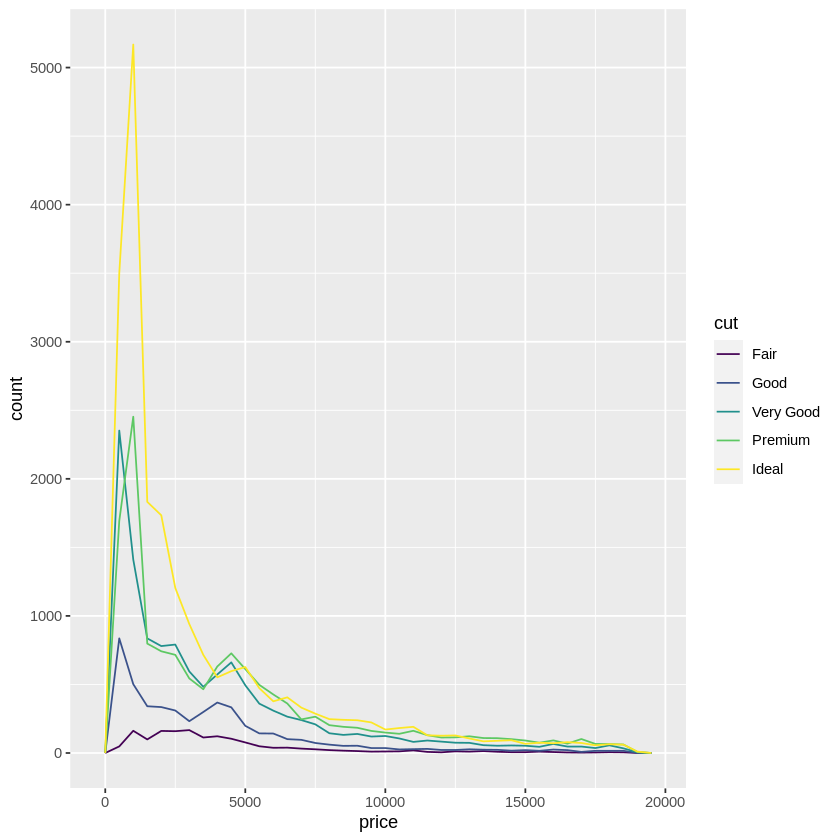

In [ ]:
ggplot(data = diamonds, mapping = aes(x = price)) + 
  geom_freqpoly(mapping = aes(colour = cut), binwidth = 500)

Hard to see difference among the distributions because there are so many more ideal diamonds in our datasets compared to, say, fair diamonds.

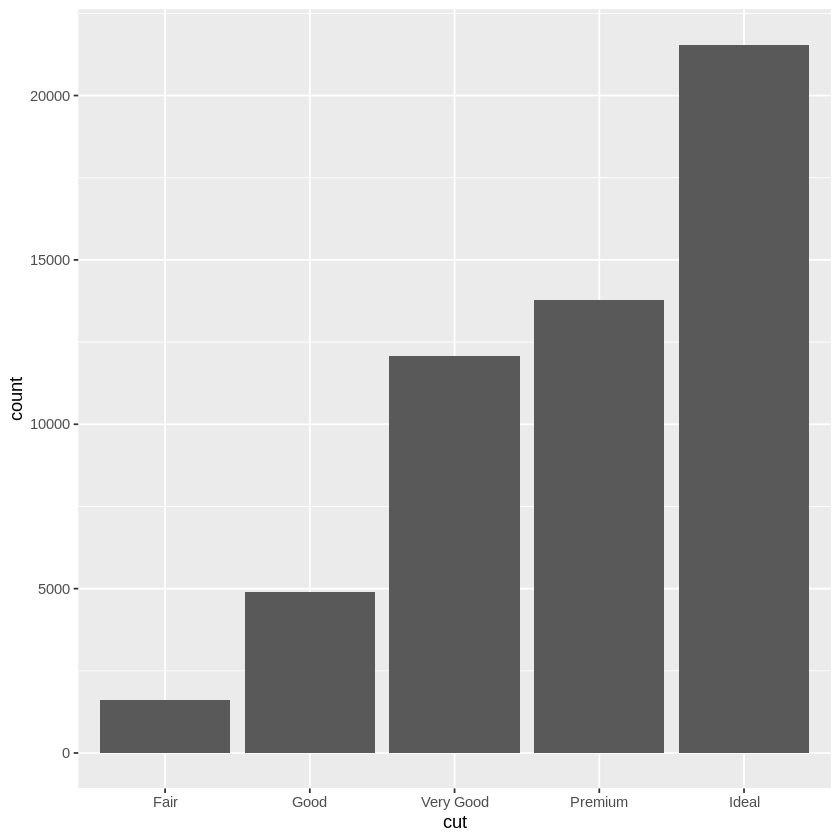

In [ ]:
ggplot(diamonds) + 
  geom_bar(mapping = aes(x = cut))

Instead of having counts on the y-axis we need to plot densities. Densities are representations of the distribution which have to integrate to 1.

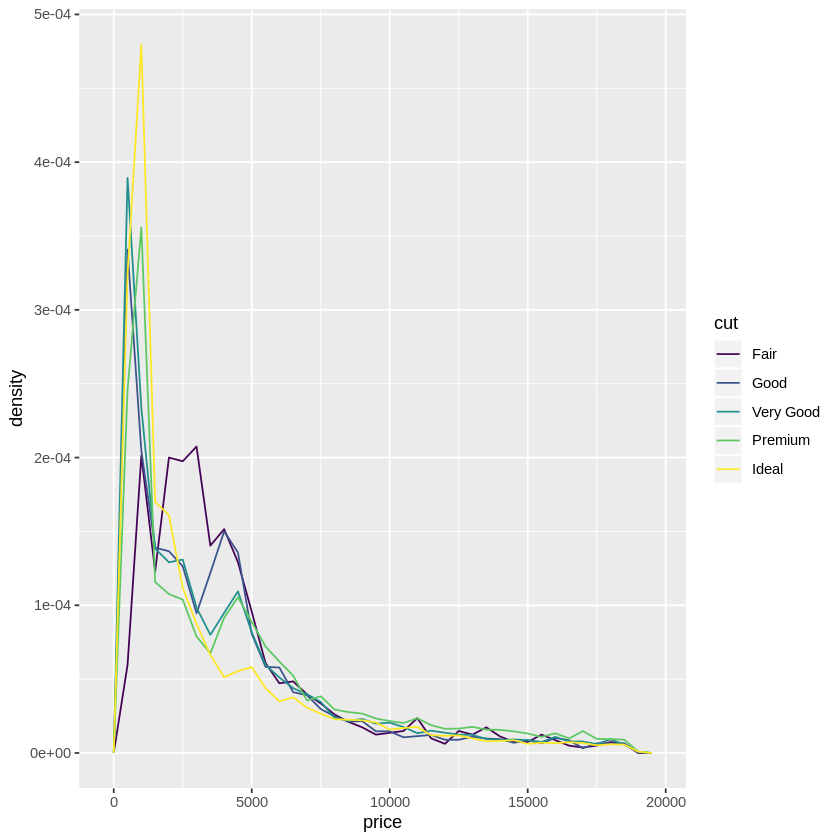

In [ ]:
# .. is identifier. In HW2, y=sqrt(..count..)
ggplot(data = diamonds, mapping = aes(x = price, y = ..density..)) + 
  geom_freqpoly(mapping = aes(colour = cut), binwidth = 500)

Looks like Fair diamonds have the highest average price?

Another way of examining the distribution of a continuous variable broken down by a categorical variable is by using boxplots.

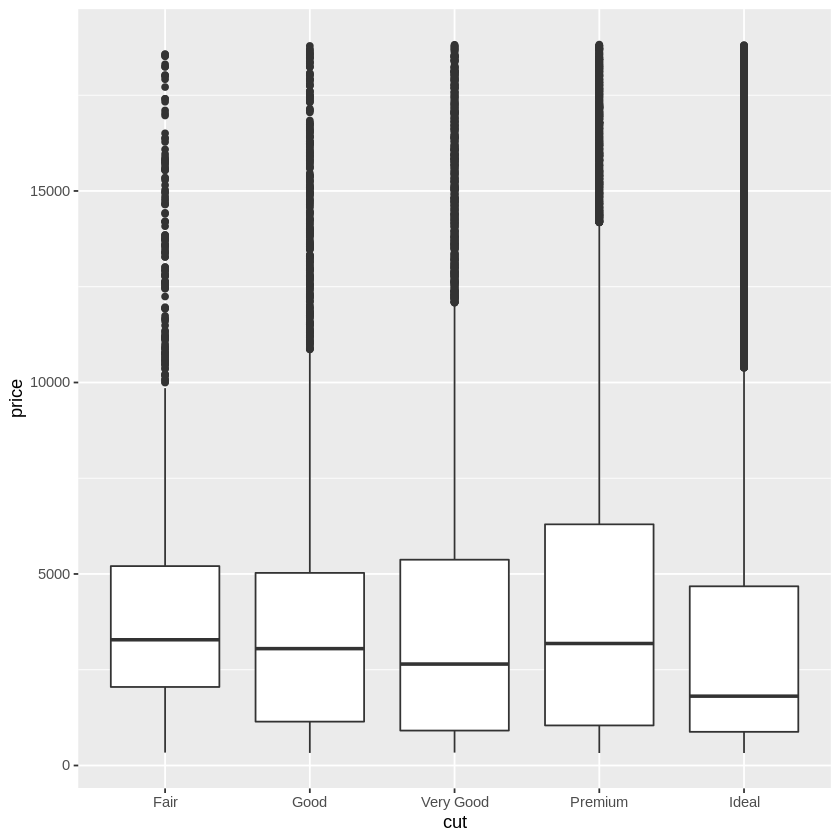

In [ ]:
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_boxplot()

Looks like it does seem like Fair diamonds have higher median price than higher quality diamonds.

When visualizing boxplots, you can reorder the categorical variables in cases where the categories do not have an intrinsic ordering. For instance take the "class" column of the mpg dataset.

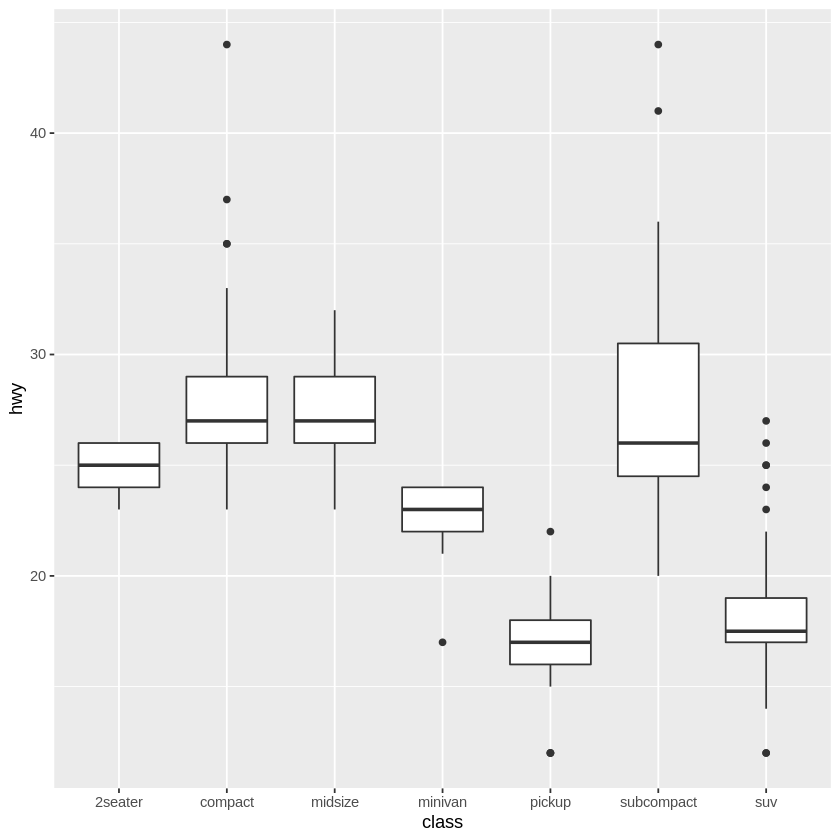

In [ ]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_boxplot()

We can order the class categories based on the median of each class

In [ ]:
?reorder

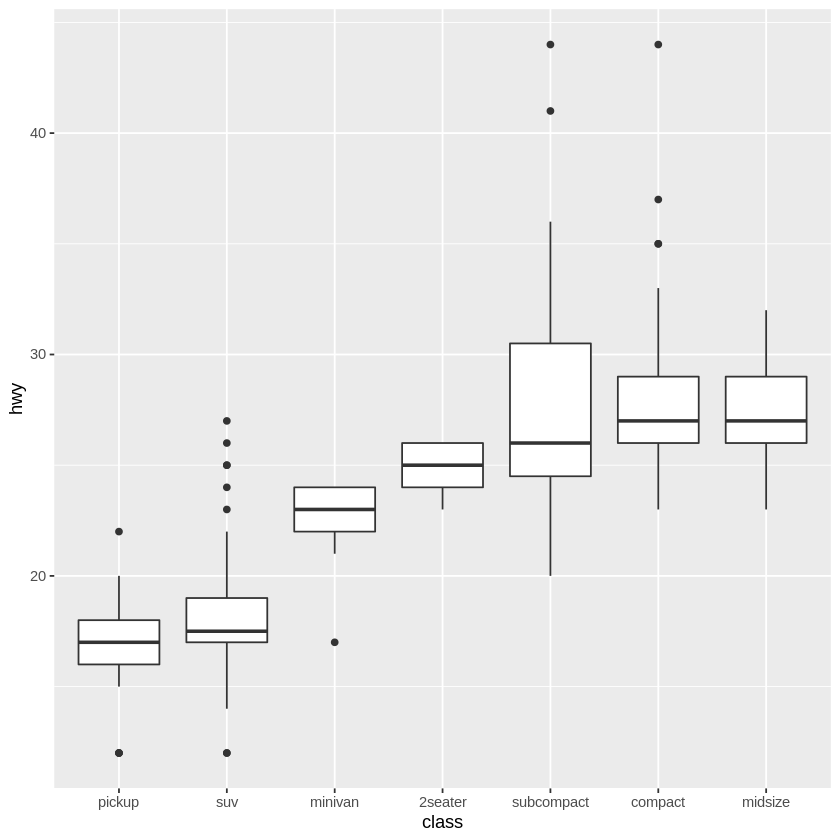

In [ ]:
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = reorder(class, hwy, FUN = median), y = hwy)) +
  xlab('class')

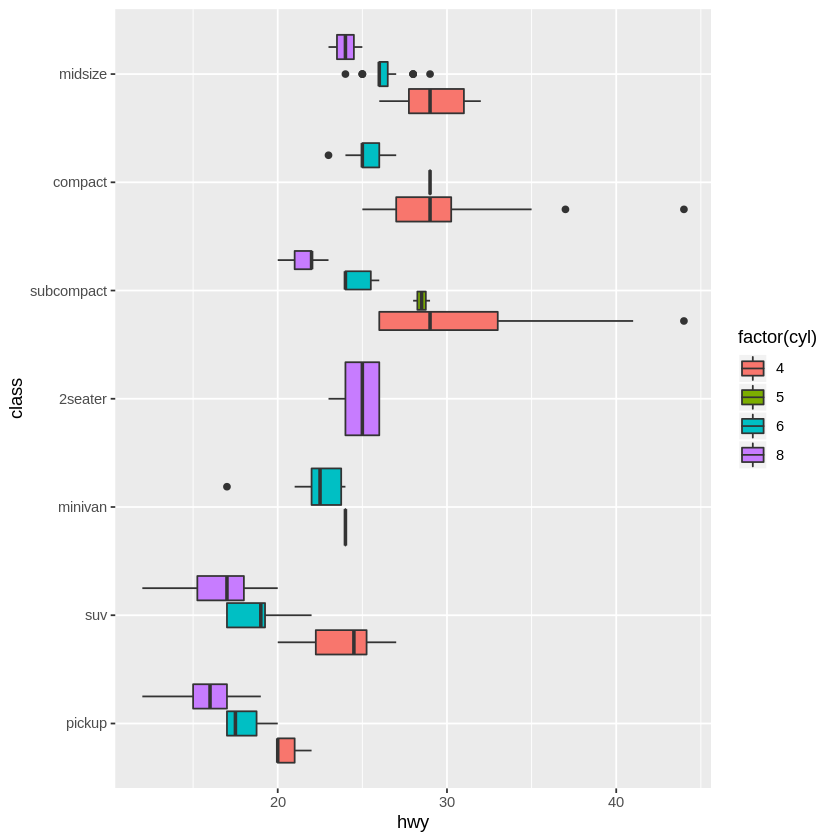

In [ ]:
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = reorder(class, hwy, FUN = median), y = hwy, fill = factor(cyl))) +
  coord_flip() + 
  xlab('class')